Use this air bnb new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.

In [ ]:
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

In [ ]:
min_limit = df["price"].quantile(0.01)
max_limit = df["price"].quantile(0.99)
new_df = df[df["price"].between(min_limit, max_limit)]
print(df.shape)
print(new_df.shape)

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("bhp.csv")
print(df1.head())
print(df1["price_per_sqft"].describe())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


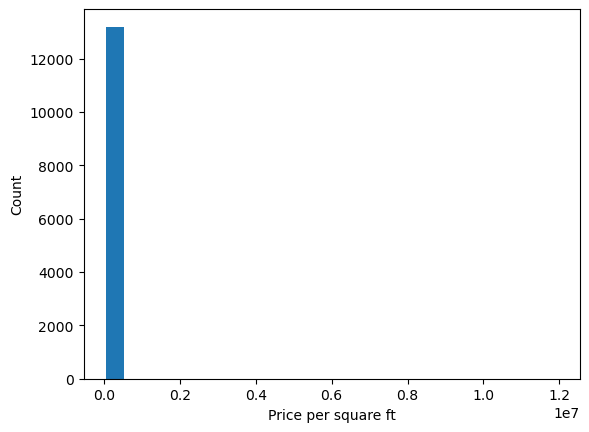

In [3]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8 )
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Others bar were negligible compared to the first bar. This confirms this data has some bad outliers. Using y scale log can help use understand better.

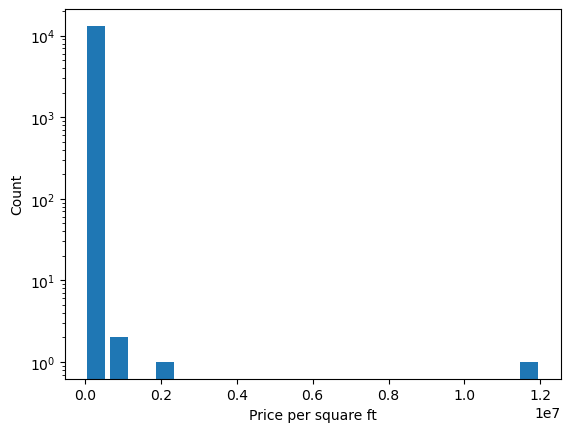

In [10]:
plt.hist(df1["price_per_sqft"], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Quantile Method

In [12]:
min_limit = df1["price_per_sqft"].quantile(0.001)
max_limit = df1["price_per_sqft"].quantile(0.999)
df2 = df1[df1["price_per_sqft"].between(min_limit, max_limit)]
print(df1.shape)
print(df2.shape)
print(df1.shape[0]-df2.shape[0])

(13200, 8)
(13172, 8)
28


Standard Deviation Method

In [13]:
mean = df2["price_per_sqft"].mean()
std = df2["price_per_sqft"].std()
min_limit = mean - 4*std
max_limit = mean + 4*std
df3 = df2[df2["price_per_sqft"].between(min_limit, max_limit)]
print(df2.shape)
print(df3.shape)
print(df2.shape[0]-df3.shape[0])

(13172, 8)
(13047, 8)
125


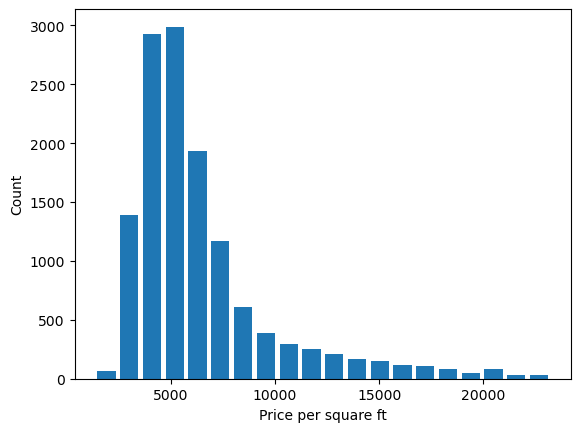

In [14]:
plt.hist(df3["price_per_sqft"], bins=20, rwidth=0.8 )
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

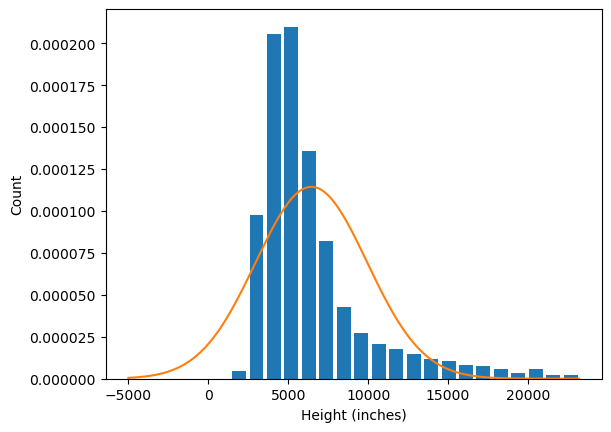

In [24]:
from scipy.stats import norm
import numpy as np

mean = df3["price_per_sqft"].mean()
std = df3["price_per_sqft"].std()

plt.hist(df3["price_per_sqft"], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3["price_per_sqft"].max(), 100)
norm_distribution = norm.pdf(rng, mean, std)
plt.plot(rng, norm_distribution)

The graph shows that there's no outliers

Z Score Method

In [ ]:
df2["z_score"] = (df2['price_per_sqft'] - mean) / std
df4 = df2[df2["z_score"].between(-4, 4)]
print(df2.shape)
print(df4.shape)
print(df2.shape[0]-df4.shape[0])

Same output as Standard Deviation method but more convenient